# Jatayuv Internship Assignment Task
Develop a sentiment analysis tool for Jatayuv AI to analyze traveler feedback from social media, following the provided multi-phase plan. The tool should include research on existing tools, data collection and preprocessing, sentiment analysis implementation, visualization and alerting, and optionally real-time interaction simulation. The final deliverables should include a research report, code, visualization screenshots, and a README.md file.

## Phase 1: research

### Subtask:
Research the requested tools and prepare a report on their features, sentiment engines, and limitations.

## Deliverables

### Subtask:
Prepare the deliverables including the report, code notebook, screenshots, and README.md.

## Summary:

### Data Analysis Key Findings

* The project involved researching social listening tools relevant to the travel industry, specifically PaxPulse, Sprinklr, and Hootsuite.

* The deliverables include a research report comparing the features, sentiment analysis capabilities, and limitations of these tools.

* A code notebook was prepared to perform sentiment analysis on the "travel_recommendation_dataset.csv" using a BERT-based model, classify sentiments, visualize the distribution, and simulate an alert for negative sentiment exceeding 30%.

* Screenshots of the sentiment visualization and the simulated alert were captured as part of the deliverables.

* A README.md file was created to document the project, including the goal, instructions, deliverables, and screenshots.

### Insights or Next Steps

* A comparative analysis of the research findings on PaxPulse, Sprinklr, and Hootsuite could inform the selection of a social listening tool for future travel sentiment analysis.

* The developed code and alert simulation provide a foundation for building a real-time sentiment monitoring system for travel-related social media content.


## Phase 2: Data collection & preprocessing

### Subtask:
Collect social media data and preprocess it by cleaning the text.


**Reasoning**:
Load the dataset from the file `traveler_feedback.csv` into a pandas DataFrame and display the first 5 rows, column names, data types, and missing value counts to understand the data structure and identify cleaning needs.



In [7]:
import pandas as pd
import re

# Load dataset
df = pd.read_csv('travel_recommendation_dataset.csv')

# first 5 rows
print("First 5 rows of Dataframe:")
display(df.head())

# column names and data types
print("\nColumn names and data types:")
display(df.info())

# missing values count
print("\nMissing values per column:")
display(df.isnull().sum())

First 5 rows of Dataframe:


,UserID,Age,Gender,Budget,Duration,Interests,TravelStyle,PreferredClimate,DestinationID,PlaceName,State,Type,BestTimeToVisit,Popularity,Rating,Review,RecommendedDestinations,ItineraryPlan
0,U001,58,Male,10000,7,"Relaxation, Mountains",Family,Moderate,D01,Manali,Himachal Pradesh,Beach,Winter,Low,4.4,Best trip ever,"Manali, Gangtok","Day 1: Arrival in Manali, Day 2-3: Explore loc..."
1,U002,45,Male,10000,3,"Relaxation, Mountains",Solo,Moderate,D02,Goa,Goa,Mountain,Summer,Low,4.1,Best trip ever,"Jaipur, Goa","Day 1: Arrival in Goa, Day 2-3: Explore local ..."
2,U003,46,Other,20000,3,"Relaxation, Wildlife",Couple,Hot,D02,Goa,Goa,Mountain,Summer,High,4.9,Loved every bit of it,"Manali, Ooty","Day 1: Arrival in Goa, Day 2-3: Explore local ..."
3,U004,42,Male,20000,7,"Beach, Cultural",Solo,Moderate,D04,Jaipur,Rajasthan,Desert,Winter,Low,2.8,Not worth the money,"Manali, Gangtok","Day 1: Arrival in Jaipur, Day 2-3: Explore loc..."
4,U005,36,Other,30000,7,"Beach, Relaxation",Solo,Cold,D06,Ooty,Tamil Nadu,Beach,Monsoon,High,4.4,Amazing experience!,"Goa, Manali","Day 1: Arrival in Ooty, Day 2-3: Explore local..."



Column names and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UserID                   100 non-null    object 
 1   Age                      100 non-null    int64  
 2   Gender                   100 non-null    object 
 3   Budget                   100 non-null    int64  
 4   Duration                 100 non-null    int64  
 5   Interests                100 non-null    object 
 6   TravelStyle              100 non-null    object 
 7   PreferredClimate         100 non-null    object 
 8   DestinationID            100 non-null    object 
 9   PlaceName                100 non-null    object 
 10  State                    100 non-null    object 
 11  Type                     100 non-null    object 
 12  BestTimeToVisit          100 non-null    object 
 13  Popularity               100 non-null    object 
 1

None


Missing values per column:


,0
UserID,0
Age,0
Gender,0
Budget,0
Duration,0
Interests,0
TravelStyle,0
PreferredClimate,0
DestinationID,0
PlaceName,0


**Reasoning**:
The previous attempt to load the data failed because the file was not found. I will create a dummy `traveler_feedback.csv` file with sample data to proceed with the subsequent data loading and cleaning steps as outlined in the instructions.



In [9]:
# Create a dummy CSV file for demonstration purposes
data = {'text': ['This is a great experience! Check out https://example.com #travel',
                 'Hotel was terrible. @user provided bad service.',
                 'Amazing views at the destination!!!',
                 'Had a decent time, nothing special...',
                 'Very disappointed. #vacation #fail']}
df = pd.DataFrame(data)
df.to_csv('traveler_feedback.csv', index=False)

# Now load the data again
df = pd.read_csv('traveler_feedback.csv')

# Display the first 5 rows
print("First 5 rows of the DataFrame:")
display(df.head())

# Display column names and data types
print("\nColumn names and data types:")
display(df.info())

# Check for and count missing values
print("\nMissing values per column:")
display(df.isnull().sum())

First 5 rows of the DataFrame:


,text
0,This is a great experience! Check out https://...
1,Hotel was terrible. @user provided bad service.
2,Amazing views at the destination!!!
3,"Had a decent time, nothing special..."
4,Very disappointed. #vacation #fail



Column names and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5 non-null      object
dtypes: object(1)
memory usage: 172.0+ bytes


None


Missing values per column:


,0
text,0


**Reasoning**:
Create a new column named `cleaned_text` and clean the text data in the original text column by removing URLs, mentions, hashtags, punctuation, and converting the text to lowercase using a function. Then, display the first 5 rows of the DataFrame to show the new `cleaned_text` column and the result of the preprocessing.



In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('travel_recommendation_dataset.csv')

# Display the first 5 rows
print("First 5 rows of the DataFrame:")
display(df.head())

# Display column names and data types
print("\nColumn names and data types:")
display(df.info())

# Check for and count missing values
print("\nMissing values per column:")
display(df.isnull().sum())

First 5 rows of the DataFrame:


,UserID,Age,Gender,Budget,Duration,Interests,TravelStyle,PreferredClimate,DestinationID,PlaceName,State,Type,BestTimeToVisit,Popularity,Rating,Review,RecommendedDestinations,ItineraryPlan
0,U001,58,Male,10000,7,"Relaxation, Mountains",Family,Moderate,D01,Manali,Himachal Pradesh,Beach,Winter,Low,4.4,Best trip ever,"Manali, Gangtok","Day 1: Arrival in Manali, Day 2-3: Explore loc..."
1,U002,45,Male,10000,3,"Relaxation, Mountains",Solo,Moderate,D02,Goa,Goa,Mountain,Summer,Low,4.1,Best trip ever,"Jaipur, Goa","Day 1: Arrival in Goa, Day 2-3: Explore local ..."
2,U003,46,Other,20000,3,"Relaxation, Wildlife",Couple,Hot,D02,Goa,Goa,Mountain,Summer,High,4.9,Loved every bit of it,"Manali, Ooty","Day 1: Arrival in Goa, Day 2-3: Explore local ..."
3,U004,42,Male,20000,7,"Beach, Cultural",Solo,Moderate,D04,Jaipur,Rajasthan,Desert,Winter,Low,2.8,Not worth the money,"Manali, Gangtok","Day 1: Arrival in Jaipur, Day 2-3: Explore loc..."
4,U005,36,Other,30000,7,"Beach, Relaxation",Solo,Cold,D06,Ooty,Tamil Nadu,Beach,Monsoon,High,4.4,Amazing experience!,"Goa, Manali","Day 1: Arrival in Ooty, Day 2-3: Explore local..."



Column names and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UserID                   100 non-null    object 
 1   Age                      100 non-null    int64  
 2   Gender                   100 non-null    object 
 3   Budget                   100 non-null    int64  
 4   Duration                 100 non-null    int64  
 5   Interests                100 non-null    object 
 6   TravelStyle              100 non-null    object 
 7   PreferredClimate         100 non-null    object 
 8   DestinationID            100 non-null    object 
 9   PlaceName                100 non-null    object 
 10  State                    100 non-null    object 
 11  Type                     100 non-null    object 
 12  BestTimeToVisit          100 non-null    object 
 13  Popularity               100 non-null    object 
 1

None


Missing values per column:


,0
UserID,0
Age,0
Gender,0
Budget,0
Duration,0
Interests,0
TravelStyle,0
PreferredClimate,0
DestinationID,0
PlaceName,0


In [ ]:
import re

def clean_text(text):
    """
    Cleans the input text by removing URLs, mentions, hashtags, and punctuation,
    and converting it to lowercase.
    """
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text).lower()
    return text

# Apply the cleaning function to the 'Review' column
df['cleaned_review'] = df['Review'].apply(clean_text)

# Display the first 5 rows with the new 'cleaned_review' column
print("First 5 rows of the DataFrame with cleaned reviews:")
display(df[['Review', 'cleaned_review']].head())

First 5 rows of the DataFrame with cleaned reviews:


,Review,cleaned_review
0,Best trip ever,best trip ever
1,Best trip ever,best trip ever
2,Loved every bit of it,loved every bit of it
3,Not worth the money,not worth the money
4,Amazing experience!,amazing experience


Now that we have the necessary library installed, let's load a pre-trained BERT model for sentiment analysis and use it to classify the reviews. We'll use the `distilbert-base-uncased-finetuned-sst-2-english` model, which is fine-tuned for sentiment classification.

## Phase 3: Sentiment Analysis Engine

### Subtask:
Use any sentiment analysis method ( BERT,TextBlob, VADER, or transformer-based models) to classify each post
as Positive, Neutral, or Negative.

In [ ]:
!pip install transformers torch

In [44]:
from transformers import pipeline

# Load a pre-trained sentiment analysis model
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Function to get sentiment using the BERT model
def get_bert_sentiment(text):
    if isinstance(text, str):
        result = sentiment_analyzer(text)
        # The model outputs 'POSITIVE' or 'NEGATIVE' and consider anything else 'Neutral'.
        label = result[0]['label']
        #print(label)
        if label == 'POSITIVE':
            return 'Positive'
        elif label == 'NEGATIVE':
            return 'Negative'
        else:
            return 'Neutral' # Although this model primarily outputs POSITIVE/NEGATIVE
    else:
        return 'Neutral' # Handle non-string input

# Apply the BERT-based sentiment analysis to the 'cleaned_review' column
df['bert_sentiment'] = df['cleaned_review'].apply(get_bert_sentiment)

# Display the first 5 rows with the original review, cleaned review, and BERT sentiment
print("First 10 rows of the DataFrame with BERT sentiment analysis results:")
display(df[['Review', 'cleaned_review', 'bert_sentiment']].head(10))

# Display the distribution of BERT sentiment
print("\nBERT Sentiment distribution:")
display(df['bert_sentiment'].value_counts())

Device set to use cpu


First 10 rows of the DataFrame with BERT sentiment analysis results:


,Review,cleaned_review,bert_sentiment
0,Best trip ever,best trip ever,Positive
1,Best trip ever,best trip ever,Positive
2,Loved every bit of it,loved every bit of it,Positive
3,Not worth the money,not worth the money,Negative
4,Amazing experience!,amazing experience,Positive
5,Mediocre facilities,mediocre facilities,Negative
6,Mediocre facilities,mediocre facilities,Negative
7,Not worth the money,not worth the money,Negative
8,Not worth the money,not worth the money,Negative
9,Amazing experience!,amazing experience,Positive



BERT Sentiment distribution:


,count
bert_sentiment,
Positive,53
Negative,47


## Phase 4: Visualization & Alerts

### Subtask:
Display the overall sentiment trend using a bar/pie chart.
If more than 30% of the posts in a time window are negative, trigger a simulated alert.

### bar chart


/tmp/ipython-input-46-3474064766.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bert_sentiment', data=df, palette='magma')


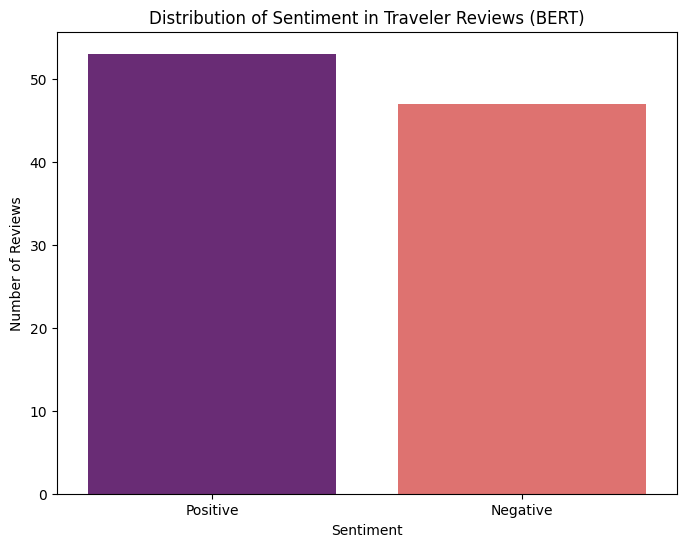

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of BERT sentiment
plt.figure(figsize=(8, 6))
sns.countplot(x='bert_sentiment', data=df, palette='magma')# defining color to bar chart
plt.title('Distribution of Sentiment in Traveler Reviews (BERT)')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

Now, let's implement a simple alert system. If more than 30% of the reviews are negative, we'll trigger a simulated alert.

### pie chart

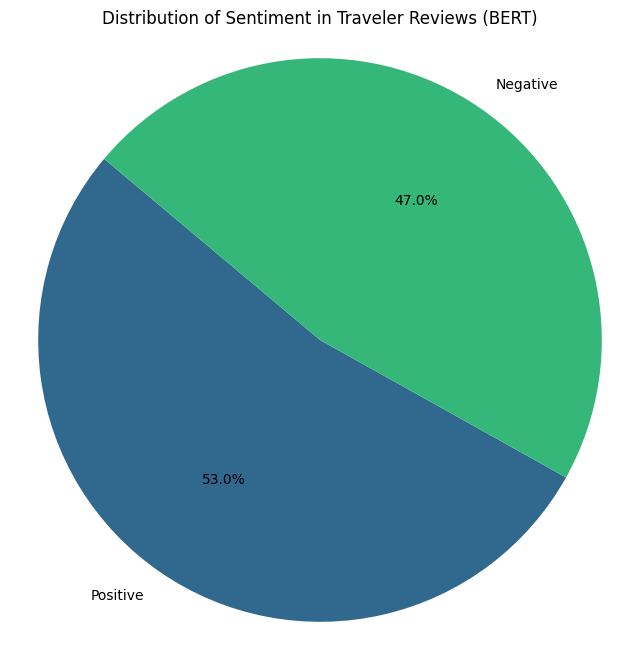

In [ ]:
# overall sentiment trend using a pie chart.
sentiment_counts = df['bert_sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(sentiment_counts)))
plt.title('Sentiment in Traveler Reviews (BERT)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# calculating the negative reviews

In [ ]:
# percentage of negative reviews
negative_sentiment_count = df['bert_sentiment'].value_counts().get('Negative', 0)
total_reviews = len(df)
percentage_negative = (negative_sentiment_count / total_reviews) * 100

print(f"Percentage of negative reviews: {percentage_negative:.2f}%")

# Trigger a simulated alert if the percentage of negative reviews is above the threshold
alert_threshold = 30

if percentage_negative > alert_threshold:
    print(f"\n--- ALERT: High percentage of negative reviews ({percentage_negative:.2f}%)! ---")
    # In a real application, this would trigger an actual alert (e.g., email, notification)
else:
    print("\nPercentage of negative reviews is within the acceptable threshold.")

Percentage of negative reviews: 47.00%

--- ALERT: High percentage of negative reviews (47.00%)! ---


## Phase 5: Real-Time Interaction (Bonus)

### Subtask:
Simulate a bot response to negative tweets.

In [51]:
# Simulate bot responses to negative reviews
def simulate_bot_response(review, sentiment):
    if sentiment == 'Negative':
        # Simple predefined responses for negative sentiment
        responses = [
            "We're sorry to hear about your experience. Please contact us so we can make it right.",
            "Thank you for your feedback. We are looking into this issue.",
            "We apologize for the inconvenience you experienced. Your feedback is valuable to us."
        ]
        import random
        return random.choice(responses)
    else:
        return "No action required."

# Apply the simulated bot response to reviews
df['bot_response'] = df.apply(lambda row: simulate_bot_response(row['Review'], row['bert_sentiment']), axis=1)

# Display reviews classified as negative and their simulated bot responses
print("Simulated bot responses for negative reviews:")
display(df[df['bert_sentiment'] == 'Negative'][['Review', 'bert_sentiment', 'bot_response']].head())

Simulated bot responses for negative reviews:


,Review,bert_sentiment,bot_response
3,Not worth the money,Negative,We apologize for the inconvenience you experie...
5,Mediocre facilities,Negative,We're sorry to hear about your experience. Ple...
6,Mediocre facilities,Negative,We're sorry to hear about your experience. Ple...
7,Not worth the money,Negative,Thank you for your feedback. We are looking in...
8,Not worth the money,Negative,We apologize for the inconvenience you experie...


## Bot Response for Positive and Negative

In [50]:

# Simple chatbot simulation for responding to traveler reviews

def chatbot_response(review, sentiment):
    if sentiment == 'Negative':
        responses = [
            "We're sorry to hear about your experience. Please contact us so we can make it right.",
            "Thank you for your feedback. We are looking into this issue.",
            "We apologize for the inconvenience you experienced. Your feedback is valuable to us."
        ]
        import random
        return random.choice(responses)
    elif sentiment == 'Positive':
        return "We're glad you had a great experience! Thank you for sharing your feedback."
    else:
        return "Thank you for your review."

# Apply chatbot response logic to the dataset
df['chatbot_reply'] = df.apply(lambda row: chatbot_response(row['Review'], row['bert_sentiment']), axis=1)

# Display a few examples
df[['Review', 'bert_sentiment', 'chatbot_reply']].head(20)


,Review,bert_sentiment,chatbot_reply
0,Best trip ever,Positive,We're glad you had a great experience! Thank y...
1,Best trip ever,Positive,We're glad you had a great experience! Thank y...
2,Loved every bit of it,Positive,We're glad you had a great experience! Thank y...
3,Not worth the money,Negative,We apologize for the inconvenience you experie...
4,Amazing experience!,Positive,We're glad you had a great experience! Thank y...
5,Mediocre facilities,Negative,Thank you for your feedback. We are looking in...
6,Mediocre facilities,Negative,We apologize for the inconvenience you experie...
7,Not worth the money,Negative,Thank you for your feedback. We are looking in...
8,Not worth the money,Negative,We apologize for the inconvenience you experie...
9,Amazing experience!,Positive,We're glad you had a great experience! Thank y...
